<a href="https://colab.research.google.com/github/ekomey/SVR-Regression/blob/Essam's-Branch/Essam_Validation%20Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.head()

le =LabelEncoder()

Holiday_labels = le.fit_transform(data['holiday'])
{index: label for index , label in enumerate(le.classes_)}

weather_main = le.fit_transform(data['weather_main'])
{index: label for index , label in enumerate(le.classes_)}

weather_description = le.fit_transform(data['weather_description'])
{index: label for index , label in enumerate(le.classes_)}

data['holiday'] = le.fit_transform(data['holiday'])
data['weather_main'] = le.fit_transform(data['weather_main'])
data['weather_description'] = le.fit_transform(data['weather_description'])

#Aggregate rows with same date-time
data_agg = data.groupby('date_time',as_index=False).agg('max')

#Convert date_time column to datetime format
data_agg['date_time'] = pd.to_datetime(data_agg['date_time'])

#Create column with hours from date_time
data_agg['hour'] = data_agg['date_time'].dt.hour

#Create column with day of the week from date_time
data_agg['day_of_week'] = data_agg['date_time'].dt.dayofweek

#Create column with month from date_time
data_agg['month'] = data_agg['date_time'].dt.month

data_agg.head()
data_agg.drop(['date_time'], axis=1)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day_of_week,month
0,6,263.49,0.0,0.0,58,1,2,1439,0,1,1
1,7,260.19,0.0,0.0,1,0,27,1747,10,1,1
2,7,260.49,0.0,0.0,20,1,4,2291,11,1,1
3,7,261.10,0.0,0.0,20,1,4,2588,12,1,1
4,7,261.55,0.0,0.0,20,1,4,2927,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40570,7,284.87,0.0,0.0,1,0,27,541,5,6,9
40571,7,284.65,0.0,0.0,1,5,17,1140,6,6,9
40572,7,284.11,0.0,0.0,1,5,17,1806,7,6,9
40573,7,284.66,0.0,0.0,20,5,17,2224,8,6,9


In [2]:
data_agg.head()
del data_agg['date_time']


In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#Dave preprocessed data to csv
data_agg.to_csv("Metro-Interstate-Traffic-Volume-Encoded.csv", index=False)
data_agg.head()

Instructions for updating:
non-resource variables are not supported in the long term


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day_of_week,month
0,6,263.49,0.0,0.0,58,1,2,1439,0,1,1
1,7,260.19,0.0,0.0,1,0,27,1747,10,1,1
2,7,260.49,0.0,0.0,20,1,4,2291,11,1,1
3,7,261.10,0.0,0.0,20,1,4,2588,12,1,1
4,7,261.55,0.0,0.0,20,1,4,2927,13,1,1


In [4]:
def dataloader():
  traffic_train = pd.read_csv("Metro-Interstate-Traffic-Volume-Encoded.csv")

  for key in traffic_train:
        traffic_train[key] = pd.to_numeric(traffic_train[key],errors='coerce')
    
  plt.show()

  traffic_array = traffic_train.to_numpy()

  return traffic_array[1:]

#Defining the input and the output
traffic_array = dataloader()


In [5]:
print(traffic_array)

[[  7.   260.19   0.   ...  10.     1.     1.  ]
 [  7.   260.49   0.   ...  11.     1.     1.  ]
 [  7.   261.1    0.   ...  12.     1.     1.  ]
 ...
 [  7.   284.11   0.   ...   7.     6.     9.  ]
 [  7.   284.66   0.   ...   8.     6.     9.  ]
 [  7.   286.54   0.   ...   9.     6.     9.  ]]


Fold:  0 , Epoch: 0
Accuracy:  17.02343
Fold:  0 , Epoch: 100
Accuracy:  29.366001
Fold:  0 , Epoch: 200
Accuracy:  29.11951
Fold:  1 , Epoch: 0
Accuracy:  49.589336
Fold:  1 , Epoch: 100
Accuracy:  21.161802
Fold:  1 , Epoch: 200
Accuracy:  21.716515
Fold:  2 , Epoch: 0
Accuracy:  70.827866
Fold:  2 , Epoch: 100
Accuracy:  36.059303
Fold:  2 , Epoch: 200
Accuracy:  36.300648
Fold:  3 , Epoch: 0
Accuracy:  17.174044
Fold:  3 , Epoch: 100
Accuracy:  23.167362
Fold:  3 , Epoch: 200
Accuracy:  23.347296
Fold:  4 , Epoch: 0
Accuracy:  0.44529068
Fold:  4 , Epoch: 100
Accuracy:  13.116448
Fold:  4 , Epoch: 200
Accuracy:  13.314532
Fold:  5 , Epoch: 0
Accuracy:  3.7392063
Fold:  5 , Epoch: 100
Accuracy:  5.7544217
Fold:  5 , Epoch: 200
Accuracy:  5.8870645
Fold:  6 , Epoch: 0
Accuracy:  0.5655308
Fold:  6 , Epoch: 100
Accuracy:  1.8611642
Fold:  6 , Epoch: 200
Accuracy:  1.979189
Fold:  7 , Epoch: 0
Accuracy:  7.325555
Fold:  7 , Epoch: 100
Accuracy:  0.7832621
Fold:  7 , Epoch: 200
Accuracy

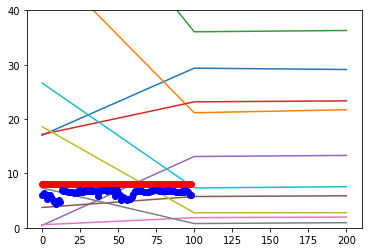

In [6]:
#Network parameters
n_hidden1 = 10 # default 10
n_hidden2 = 10 # default 10
n_input = 10
n_output = 1
#Learning parameters
learning_constant = 0.05 # default 0.2
number_epochs = 300 # default 1000
batch_size = 30 # default 1000

#Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases output layer
b3 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

def multilayer_perceptron(input_d):
    # Preprocessing layer to normalize inputs
    normalization_layer = tf.keras.layers.BatchNormalization()(input_d, training=True)

    #Task of neurons of first hidden layer
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(normalization_layer, w1), b1))
    #Task of neurons of second hidden layer
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))

    #Task of neurons of output layer
    out_layer = tf.add(tf.matmul(layer_2, w3),b3)

    return out_layer

folds_accuracy = []

with tf.Session() as sess:

    # Do 10-fold cross-validation to evaluate the network
    kf = KFold(n_splits=10)
    for i, (train, test) in enumerate(kf.split(traffic_array)):

        X_train = traffic_array[train,:-1]
        X_test = traffic_array[test,:-1]
        y_train = np.expand_dims(traffic_array[train,-1], axis=1)
        y_test = np.expand_dims(traffic_array[test,-1], axis=1)

        #Create model
        neural_network = multilayer_perceptron(X)

        #Define loss and optimizer
        loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network, Y))

        optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

        #Initializing the variables
        init = tf.global_variables_initializer()

        sess.run(init)

        epochs_accuracy = []
        #Training epoch
        for epoch in range(number_epochs):
            sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
            #Display the epoch
            if epoch % 100 == 0:
                print("Fold: ", i, ", Epoch:", '%d' % (epoch))
                pred = (neural_network) # Apply softmax to logits
                accuracy=tf.keras.losses.MSE(pred,Y)
                mean_accuracy = np.mean(accuracy.eval({X: X_test, Y:y_test}))
                epochs_accuracy.append(mean_accuracy)
                print("Accuracy: ", mean_accuracy)
            
        # Test model
        pred = (neural_network) # Apply softmax to logits
        accuracy=tf.keras.losses.MSE(pred,Y)
        accuracy_eval = accuracy.eval({X: X_test, Y:y_test})
        folds_accuracy.append(np.mean(accuracy_eval))

        plt.plot(np.arange(0, number_epochs, 100), epochs_accuracy)

    print(folds_accuracy)
    print("Average Accuracy: ", np.mean(folds_accuracy))

    output=neural_network.eval({X: X_test})
    y_labels = np.squeeze(y_test)
    output = np.squeeze(output)
    
    plt.plot([int(y) for y in y_labels[1:100]], 'ro', output[1:100], 'bo')
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 50, 10))

    plt.show()

NotImplementedError: ignored

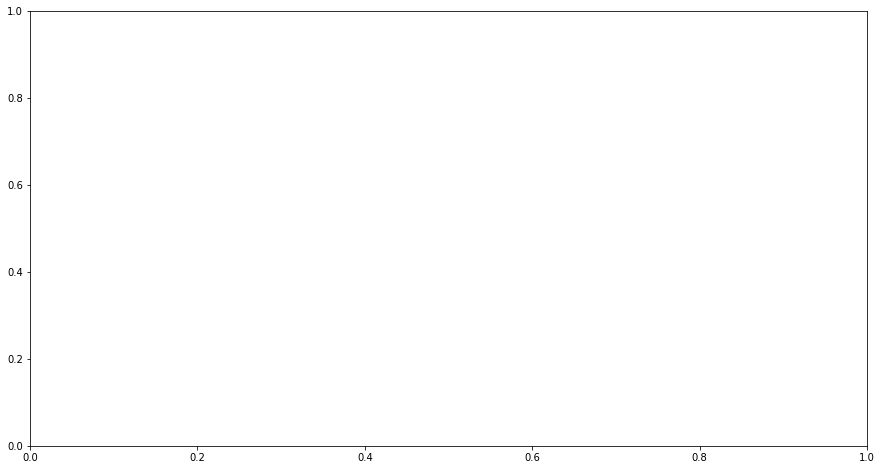

In [ ]:
#Plotting the graph 
plt.figure(figsize=(15,8))
plt.scatter (y_test, pred) 
range = [y_test.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

plt.figure(figsize=(15,8))
plt.plot(y_test[:100],label="Original Data")
plt.plot(pred[:100],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Traffic Volume')
plt.xlabel('Y_test')
plt.title('100 datapoints of Traffic Volume vs Y_test')
plt.show()